In [42]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import scipy as sp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix


In [2]:
df= pd.read_table("diabetic_data 1.csv",sep=',')
df

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,readmitted
0,Female,[0-10),6,25,1,1,41,0,1,0,...,None,None,No,No,No,No,No,No,No,NO
1,Female,[10-20),1,1,7,3,59,0,18,0,...,None,None,No,No,No,No,Up,Ch,Yes,>30
2,Female,[20-30),1,1,7,2,11,5,13,2,...,None,None,No,Steady,No,No,No,No,Yes,NO
3,Male,[30-40),1,1,7,2,44,1,16,0,...,None,None,No,No,No,No,Up,Ch,Yes,NO
4,Male,[40-50),1,1,7,1,51,0,8,0,...,None,None,No,Steady,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,[70-80),3,1,1,1,19,2,12,0,...,None,None,No,No,No,No,No,No,No,>30
49995,Female,[80-90),1,6,7,2,38,0,12,0,...,None,None,No,No,No,No,No,No,Yes,NO
49996,Female,[70-80),3,1,1,8,40,3,27,0,...,None,None,No,No,Steady,No,No,No,Yes,>30
49997,Female,[60-70),3,1,1,1,37,6,12,0,...,None,None,No,No,No,Steady,No,No,Yes,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    49999 non-null  object
 1   age                       49999 non-null  object
 2   admission_type_id         49999 non-null  int64 
 3   discharge_disposition_id  49999 non-null  int64 
 4   admission_source_id       49999 non-null  int64 
 5   time_in_hospital          49999 non-null  int64 
 6   num_lab_procedures        49999 non-null  int64 
 7   num_procedures            49999 non-null  int64 
 8   num_medications           49999 non-null  int64 
 9   number_outpatient         49999 non-null  int64 
 10  number_inpatient          49999 non-null  int64 
 11  number_diagnoses          49999 non-null  int64 
 12  max_glu_serum             49999 non-null  object
 13  A1Cresult                 49999 non-null  object
 14  metformin             

In [4]:
df.isnull().sum()

gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glipizide                   0
glyburide                   0
pioglitazone                0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [5]:
df.skew()

admission_type_id           1.307158
discharge_disposition_id    2.093904
admission_source_id         1.021095
time_in_hospital            1.064055
num_lab_procedures         -0.124926
num_procedures              1.243884
num_medications             1.501446
number_outpatient           9.325855
number_inpatient            3.742642
number_diagnoses           -0.529861
dtype: float64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
t=le.fit_transform(df["readmitted"])
t

array([2, 1, 2, ..., 1, 2, 2])

In [7]:
df["le_readmitted"]=t

In [8]:
df.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_inpatient,number_diagnoses,le_readmitted
admission_type_id,1.000000,0.110453,0.307662,-0.025548,-0.160155,0.081034,0.106185,0.112242,-0.024357,-0.047494,-0.013588
discharge_disposition_id,0.110453,1.000000,0.011538,0.143722,-0.016261,0.024875,0.102009,-0.015003,0.015259,0.068442,0.001223
admission_source_id,0.307662,0.011538,1.000000,-0.031961,-0.076754,-0.148522,-0.028074,0.154672,0.039772,0.113011,-0.033256
time_in_hospital,-0.025548,0.143722,-0.031961,1.000000,0.261727,0.229667,0.457213,-0.019833,0.080790,0.264381,-0.065878
num_lab_procedures,-0.160155,-0.016261,-0.076754,0.261727,1.000000,0.096691,0.218005,-0.053443,0.042281,0.103974,-0.030166
num_procedures,0.081034,0.024875,-0.148522,0.229667,0.096691,1.000000,0.431755,-0.020185,-0.060803,0.105745,0.035136
num_medications,0.106185,0.102009,-0.028074,0.457213,0.218005,0.431755,1.000000,0.037052,0.051974,0.252725,-0.050411
number_outpatient,0.112242,-0.015003,0.154672,-0.019833,-0.053443,-0.020185,0.037052,1.000000,0.088157,0.086552,-0.062254
number_inpatient,-0.024357,0.015259,0.039772,0.080790,0.042281,-0.060803,0.051974,0.088157,1.000000,0.121427,-0.220132
number_diagnoses,-0.047494,0.068442,0.113011,0.264381,0.103974,0.105745,0.252725,0.086552,0.121427,1.000000,-0.133770


In [9]:
#df=df.drop("number_emergency",axis=1)
df

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,readmitted,le_readmitted
0,Female,[0-10),6,25,1,1,41,0,1,0,...,None,No,No,No,No,No,No,No,NO,2
1,Female,[10-20),1,1,7,3,59,0,18,0,...,None,No,No,No,No,Up,Ch,Yes,>30,1
2,Female,[20-30),1,1,7,2,11,5,13,2,...,None,No,Steady,No,No,No,No,Yes,NO,2
3,Male,[30-40),1,1,7,2,44,1,16,0,...,None,No,No,No,No,Up,Ch,Yes,NO,2
4,Male,[40-50),1,1,7,1,51,0,8,0,...,None,No,Steady,No,No,Steady,Ch,Yes,NO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,[70-80),3,1,1,1,19,2,12,0,...,None,No,No,No,No,No,No,No,>30,1
49995,Female,[80-90),1,6,7,2,38,0,12,0,...,None,No,No,No,No,No,No,Yes,NO,2
49996,Female,[70-80),3,1,1,8,40,3,27,0,...,None,No,No,Steady,No,No,No,Yes,>30,1
49997,Female,[60-70),3,1,1,1,37,6,12,0,...,None,No,No,No,Steady,No,No,Yes,NO,2


In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
cat= ["gender","age","max_glu_serum","A1Cresult","metformin","glipizide","glyburide","pioglitazone","insulin","change","diabetesMed"]
df[cat]=oe.fit_transform(df[cat])
df

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,readmitted,le_readmitted
0,0.0,0.0,6,25,1,1,41,0,1,0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NO,2
1,0.0,1.0,1,1,7,3,59,0,18,0,...,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,>30,1
2,0.0,2.0,1,1,7,2,11,5,13,2,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NO,2
3,1.0,3.0,1,1,7,2,44,1,16,0,...,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,NO,2
4,1.0,4.0,1,1,7,1,51,0,8,0,...,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,NO,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1.0,7.0,3,1,1,1,19,2,12,0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,>30,1
49995,0.0,8.0,1,6,7,2,38,0,12,0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NO,2
49996,0.0,7.0,3,1,1,8,40,3,27,0,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,>30,1
49997,0.0,6.0,3,1,1,1,37,6,12,0,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NO,2


In [11]:
df.corr()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,le_readmitted
gender,1.000000,-0.049820,0.019927,-0.011212,-0.006191,-0.023071,0.000858,0.068198,-0.014279,-0.003831,...,0.000605,-0.013622,0.004840,0.021411,0.030180,0.008426,-0.005106,-0.005612,0.014368,0.011274
age,-0.049820,1.000000,0.029738,0.095011,0.067764,0.125184,-0.022317,-0.017639,0.036056,0.028091,...,-0.007050,0.099879,-0.041681,0.044340,0.068715,0.014877,-0.057390,0.033357,-0.042740,-0.027684
admission_type_id,0.019927,0.029738,1.000000,0.110453,0.307662,-0.025548,-0.160155,0.081034,0.106185,0.112242,...,-0.116837,0.035756,0.003363,0.013342,-0.010427,0.025433,-0.025503,-0.020667,-0.003107,-0.013588
discharge_disposition_id,-0.011212,0.095011,0.110453,1.000000,0.011538,0.143722,-0.016261,0.024875,0.102009,-0.015003,...,-0.022534,0.009992,-0.000147,-0.027396,0.049526,-0.017518,-0.049385,0.027238,-0.052159,0.001223
admission_source_id,-0.006191,0.067764,0.307662,0.011538,1.000000,-0.031961,-0.076754,-0.148522,-0.028074,0.154672,...,-0.107521,0.022513,-0.020906,0.007106,-0.005320,0.007086,-0.022841,-0.034833,0.015424,-0.033256
time_in_hospital,-0.023071,0.125184,-0.025548,0.143722,-0.031961,1.000000,0.261727,0.229667,0.457213,-0.019833,...,-0.039240,-0.025678,-0.008686,0.012103,0.015859,0.009002,0.055759,-0.098541,0.062358,-0.065878
num_lab_procedures,0.000858,-0.022317,-0.160155,-0.016261,-0.076754,0.261727,1.000000,0.096691,0.218005,-0.053443,...,0.032721,-0.150927,-0.036309,0.010743,-0.004219,-0.016509,0.045199,-0.013970,0.024315,-0.030166
num_procedures,0.068198,-0.017639,0.081034,0.024875,-0.148522,0.229667,0.096691,1.000000,0.431755,-0.020185,...,0.021043,0.006216,-0.030826,0.005455,0.005307,0.011767,0.021480,-0.013816,0.002806,0.035136
num_medications,-0.014279,0.036056,0.106185,0.102009,-0.028074,0.457213,0.218005,0.431755,1.000000,0.037052,...,-0.040692,0.007199,0.058066,0.044303,0.038417,0.057138,0.091332,-0.229864,0.178167,-0.050411
number_outpatient,-0.003831,0.028091,0.112242,-0.015003,0.154672,-0.019833,-0.053443,-0.020185,0.037052,1.000000,...,-0.023592,0.029893,0.000879,0.013114,-0.014365,0.023928,-0.001988,-0.049934,0.031634,-0.062254


In [12]:
df.skew()

gender                      0.160078
age                        -0.668746
admission_type_id           1.307158
discharge_disposition_id    2.093904
admission_source_id         1.021095
time_in_hospital            1.064055
num_lab_procedures         -0.124926
num_procedures              1.243884
num_medications             1.501446
number_outpatient           9.325855
number_inpatient            3.742642
number_diagnoses           -0.529861
max_glu_serum              -2.430375
A1Cresult                  -1.970157
metformin                   1.849780
glipizide                   2.389644
glyburide                   2.474166
pioglitazone                3.903183
insulin                     0.301526
change                     -0.378837
diabetesMed                -1.139872
le_readmitted              -0.780706
dtype: float64

In [13]:
df.drop("readmitted",axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    49999 non-null  float64
 1   age                       49999 non-null  float64
 2   admission_type_id         49999 non-null  int64  
 3   discharge_disposition_id  49999 non-null  int64  
 4   admission_source_id       49999 non-null  int64  
 5   time_in_hospital          49999 non-null  int64  
 6   num_lab_procedures        49999 non-null  int64  
 7   num_procedures            49999 non-null  int64  
 8   num_medications           49999 non-null  int64  
 9   number_outpatient         49999 non-null  int64  
 10  number_inpatient          49999 non-null  int64  
 11  number_diagnoses          49999 non-null  int64  
 12  max_glu_serum             49999 non-null  float64
 13  A1Cresult                 49999 non-null  float64
 14  metfor

In [15]:
df

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,le_readmitted
0,0.0,0.0,6,25,1,1,41,0,1,0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2
1,0.0,1.0,1,1,7,3,59,0,18,0,...,2.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,1
2,0.0,2.0,1,1,7,2,11,5,13,2,...,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2
3,1.0,3.0,1,1,7,2,44,1,16,0,...,2.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,2
4,1.0,4.0,1,1,7,1,51,0,8,0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1.0,7.0,3,1,1,1,19,2,12,0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
49995,0.0,8.0,1,6,7,2,38,0,12,0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
49996,0.0,7.0,3,1,1,8,40,3,27,0,...,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1
49997,0.0,6.0,3,1,1,1,37,6,12,0,...,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2


<AxesSubplot:>

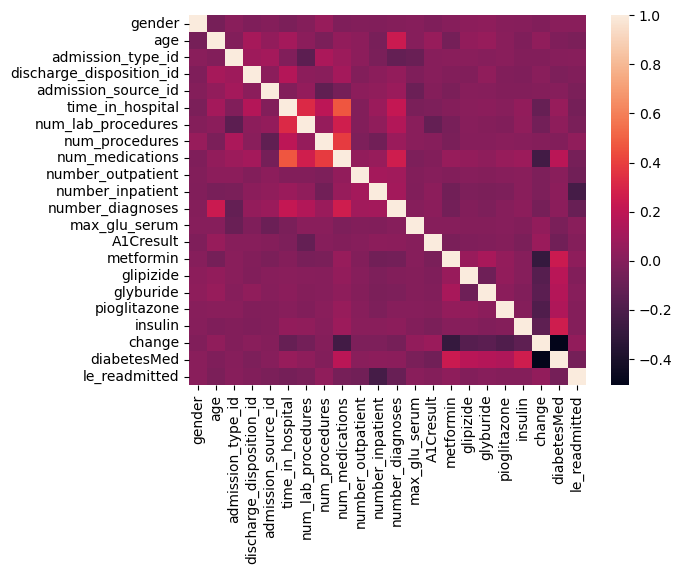

In [17]:
sns.heatmap(df.corr())

In [18]:
df.corr()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed,le_readmitted
gender,1.000000,-0.049820,0.019927,-0.011212,-0.006191,-0.023071,0.000858,0.068198,-0.014279,-0.003831,...,0.000605,-0.013622,0.004840,0.021411,0.030180,0.008426,-0.005106,-0.005612,0.014368,0.011274
age,-0.049820,1.000000,0.029738,0.095011,0.067764,0.125184,-0.022317,-0.017639,0.036056,0.028091,...,-0.007050,0.099879,-0.041681,0.044340,0.068715,0.014877,-0.057390,0.033357,-0.042740,-0.027684
admission_type_id,0.019927,0.029738,1.000000,0.110453,0.307662,-0.025548,-0.160155,0.081034,0.106185,0.112242,...,-0.116837,0.035756,0.003363,0.013342,-0.010427,0.025433,-0.025503,-0.020667,-0.003107,-0.013588
discharge_disposition_id,-0.011212,0.095011,0.110453,1.000000,0.011538,0.143722,-0.016261,0.024875,0.102009,-0.015003,...,-0.022534,0.009992,-0.000147,-0.027396,0.049526,-0.017518,-0.049385,0.027238,-0.052159,0.001223
admission_source_id,-0.006191,0.067764,0.307662,0.011538,1.000000,-0.031961,-0.076754,-0.148522,-0.028074,0.154672,...,-0.107521,0.022513,-0.020906,0.007106,-0.005320,0.007086,-0.022841,-0.034833,0.015424,-0.033256
time_in_hospital,-0.023071,0.125184,-0.025548,0.143722,-0.031961,1.000000,0.261727,0.229667,0.457213,-0.019833,...,-0.039240,-0.025678,-0.008686,0.012103,0.015859,0.009002,0.055759,-0.098541,0.062358,-0.065878
num_lab_procedures,0.000858,-0.022317,-0.160155,-0.016261,-0.076754,0.261727,1.000000,0.096691,0.218005,-0.053443,...,0.032721,-0.150927,-0.036309,0.010743,-0.004219,-0.016509,0.045199,-0.013970,0.024315,-0.030166
num_procedures,0.068198,-0.017639,0.081034,0.024875,-0.148522,0.229667,0.096691,1.000000,0.431755,-0.020185,...,0.021043,0.006216,-0.030826,0.005455,0.005307,0.011767,0.021480,-0.013816,0.002806,0.035136
num_medications,-0.014279,0.036056,0.106185,0.102009,-0.028074,0.457213,0.218005,0.431755,1.000000,0.037052,...,-0.040692,0.007199,0.058066,0.044303,0.038417,0.057138,0.091332,-0.229864,0.178167,-0.050411
number_outpatient,-0.003831,0.028091,0.112242,-0.015003,0.154672,-0.019833,-0.053443,-0.020185,0.037052,1.000000,...,-0.023592,0.029893,0.000879,0.013114,-0.014365,0.023928,-0.001988,-0.049934,0.031634,-0.062254


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    49999 non-null  float64
 1   age                       49999 non-null  float64
 2   admission_type_id         49999 non-null  int64  
 3   discharge_disposition_id  49999 non-null  int64  
 4   admission_source_id       49999 non-null  int64  
 5   time_in_hospital          49999 non-null  int64  
 6   num_lab_procedures        49999 non-null  int64  
 7   num_procedures            49999 non-null  int64  
 8   num_medications           49999 non-null  int64  
 9   number_outpatient         49999 non-null  int64  
 10  number_inpatient          49999 non-null  int64  
 11  number_diagnoses          49999 non-null  int64  
 12  max_glu_serum             49999 non-null  float64
 13  A1Cresult                 49999 non-null  float64
 14  metfor

In [20]:
df1=df.drop("le_readmitted", axis=1)

In [21]:
x=df1

In [22]:
x

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,number_diagnoses,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,insulin,change,diabetesMed
0,0.0,0.0,6,25,1,1,41,0,1,0,...,1,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,1.0,1,1,7,3,59,0,18,0,...,9,2.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0
2,0.0,2.0,1,1,7,2,11,5,13,2,...,6,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
3,1.0,3.0,1,1,7,2,44,1,16,0,...,7,2.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0
4,1.0,4.0,1,1,7,1,51,0,8,0,...,5,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1.0,7.0,3,1,1,1,19,2,12,0,...,9,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
49995,0.0,8.0,1,6,7,2,38,0,12,0,...,5,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
49996,0.0,7.0,3,1,1,8,40,3,27,0,...,9,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
49997,0.0,6.0,3,1,1,1,37,6,12,0,...,6,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [23]:
y=df.iloc[:,21]
y

0        2
1        1
2        2
3        2
4        2
        ..
49994    1
49995    2
49996    1
49997    2
49998    2
Name: le_readmitted, Length: 49999, dtype: int32

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=2023)

In [25]:
def mymodel(model):
    #model creation 
    model.fit(xtrain, ytrain)
    ypred=model.predict(xtest)
    
    #checking bias and variance 
    train= model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'Training Score:{train},Testing Score:{test}')
    
    #model evaluation
    print(classification_report(ytest,ypred))
    return model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from skleafrom sklearn.linear_model import LogisticRegression
rn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [27]:
mymodel(LogisticRegression())

Training Score:0.5638446812766079,Testing Score:0.5592666666666667
              precision    recall  f1-score   support

           0       0.46      0.01      0.03      1695
           1       0.46      0.24      0.31      5200
           2       0.58      0.88      0.70      8105

    accuracy                           0.56     15000
   macro avg       0.50      0.38      0.35     15000
weighted avg       0.53      0.56      0.49     15000



LogisticRegression()

In [28]:
mymodel(KNeighborsClassifier())

Training Score:0.6651047172776365,Testing Score:0.5027333333333334
              precision    recall  f1-score   support

           0       0.18      0.12      0.14      1695
           1       0.41      0.41      0.41      5200
           2       0.60      0.64      0.62      8105

    accuracy                           0.50     15000
   macro avg       0.40      0.39      0.39     15000
weighted avg       0.49      0.50      0.49     15000



KNeighborsClassifier()

In [ ]:
mymodel(SVC())

In [29]:
mymodel(DecisionTreeClassifier())

Training Score:0.9999714277550787,Testing Score:0.469
              precision    recall  f1-score   support

           0       0.15      0.17      0.16      1695
           1       0.39      0.40      0.40      5200
           2       0.60      0.58      0.59      8105

    accuracy                           0.47     15000
   macro avg       0.38      0.38      0.38     15000
weighted avg       0.48      0.47      0.47     15000



DecisionTreeClassifier()

In [30]:
mymodel(RandomForestClassifier())

Training Score:0.9999714277550787,Testing Score:0.5729333333333333
              precision    recall  f1-score   support

           0       0.31      0.03      0.05      1695
           1       0.48      0.42      0.44      5200
           2       0.62      0.79      0.69      8105

    accuracy                           0.57     15000
   macro avg       0.47      0.41      0.40     15000
weighted avg       0.53      0.57      0.53     15000



RandomForestClassifier()

# SCALING

In [31]:
sc= StandardScaler()
xtrains= sc.fit_transform(xtrain)
xtests=sc.fit_transform(xtest)

# Fitting scaled data into Logistic regression algorithm

In [32]:
lr1=LogisticRegression()
lr1.fit(xtrains,ytrain)

LogisticRegression()

In [33]:
train_lr=lr1.score(xtrains,ytrain)
test_lr=lr1.score(xtests,ytest)

print(f"Training Accuracy :{train_lr}, Testing Accuracy : {test_lr}")

Training Accuracy :0.565873310666019, Testing Accuracy : 0.5588


# Fitting scaled data into Random Forest algorithm

In [38]:
RF=RandomForestClassifier()
RF.fit(xtrains,ytrain)

train_RF=RF.score(xtrains,ytrain)
test_RF=RF.score(xtests,ytest)

ypred=RF.predict(xtests)

    
print(f"Training Accuracy :{train_RF}, Testing Accuracy : {test_RF}")
print(classification_report(ytest,ypred))


Training Accuracy :0.9999714277550787, Testing Accuracy : 0.5758
              precision    recall  f1-score   support

           0       0.34      0.03      0.06      1695
           1       0.48      0.42      0.45      5200
           2       0.62      0.79      0.70      8105

    accuracy                           0.58     15000
   macro avg       0.48      0.41      0.40     15000
weighted avg       0.54      0.58      0.54     15000



In [ ]:
plot_confusion_matrix()